<h1> Feature Engineering </h1>
<p> Feature engineering is the process of using domain knowledge to extract features from a row data. These feature can be used to improve the performance of ML algorithms</p>
<br></br>
<body>
    
<p> 
    Feature engineering can be devided into four parts:- <br>
        <b>1. Feature Transformation 2. Feature Construction 3. Feature Selection 4. Feature Extraction</b>
    </br>
    </p>
    <p>
    1. Feature Transformation can further be devided into four parts:- <br></br>
     <b>a. Missing Value Imputation<br></br>
        b. Handling Categorical Features<br></br>
        c. Outlier Detection<br></br>
        d. Feature Scaling</b>
        

</p>

</body>


### Feature Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.iloc[:,2:]
df.sample(8)

,Age,EstimatedSalary,Purchased
372,39,73000,0
306,51,134000,0
230,35,147000,1
52,29,83000,0
201,49,74000,0
98,35,73000,0
205,47,47000,0
197,20,36000,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.25, random_state=17)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((300, 2), (100, 2), (300,), (100,))

#### Standard Scalar or Z-Score

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()


#fit the scalar in train set, it will learn the parameters
scalar.fit(X_train)

#transform the train and test sets
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [8]:
scalar.mean_

array([3.74333333e+01, 7.05433333e+04])

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
X_test_scaled.shape

(100, 2)

In [11]:
np.round(X_train.describe(),1)

#here 1 refer to the number of decimal points

,Age,EstimatedSalary
count,300.0,300.0
mean,37.4,70543.3
std,10.3,35238.4
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [12]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.0,0.0
75%,0.7,0.5
max,2.2,2.3


#### Effect of Scaling

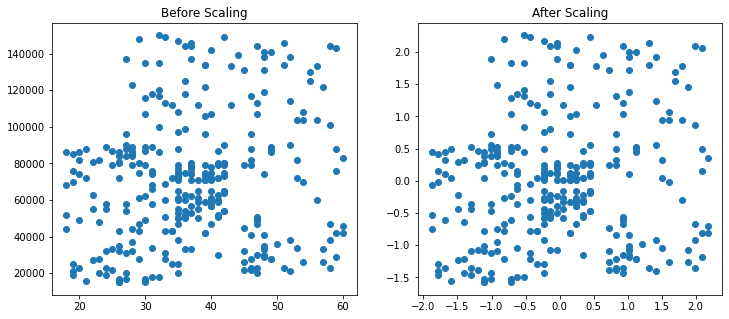

In [13]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()


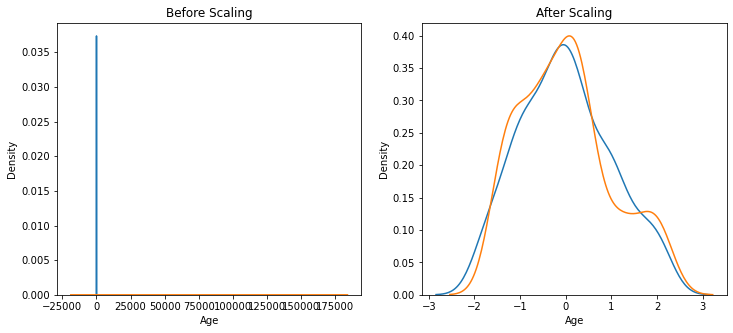

In [14]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("After Scaling")
plt.show()


<h3>Why scaling is important?</h3>

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr_scalar = LogisticRegression()

In [18]:
lr.fit(X_train,y_train)
lr_scalar.fit(X_train_scaled,y_train)

LogisticRegression()

In [19]:
X_train

,Age,EstimatedSalary
29,31,18000
255,52,90000
167,35,71000
132,30,87000
219,59,143000
...,...,...
313,49,141000
390,48,33000
143,30,89000
241,38,59000


In [20]:
X_test_scaled

,Age,EstimatedSalary
0,-1.494240,-1.493572
1,-1.010145,0.524640
2,-0.816507,0.354087
3,1.023054,1.803789
4,1.119874,-0.981912
...,...,...
95,1.991245,0.695193
96,1.216693,0.496215
97,0.054864,0.268811
98,1.410331,2.258597


In [25]:
y_pred = lr.predict(X_test)
y_pred_scaled= lr_scalar.predict(X_test_scaled)

In [26]:
y_pred_scaled

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(f'Training Accuracy: {lr.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 0.63
Testing Accuracy: 0.68


In [29]:
print(lr.score(X_test,y_test))

0.68


In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.68
Scaled 0.85


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc=DecisionTreeClassifier()
dtc_s=DecisionTreeClassifier()

In [34]:
dtc.fit(X_train,y_train)
dtc_s.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dtc.predict(X_test)
y_pred_scaled= dtc_s.predict(X_test_scaled)

In [36]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.84
Scaled 0.84
